# Hypothesis 2: Higher income will result in more 311 requests

by James Ye

In [12]:
# import the necessary modules
import pandas as pd
import csv
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

# set figure size to 16x8
plt.rcParams['figure.figsize'] = [16, 8]

In [13]:
# load final_df.csv which contains 311 cases and Census data from 2017 and onward
final_df = pd.read_csv('final_df.csv')
# drop the Unnamed column
del final_df['Unnamed: 0']
final_df.head()

,CaseID,Opened,Category,Request Type,Neighborhood,Latitude,Longitude,Source,Media URL,Opened Date,Opened Year,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,10395976,01/23/2019 01:34:53 PM,Sign Repair,Sign - Missing,Mission,37.764091,-122.413002,Web,NaN,01/23/2019,2019,94110,73737.0,36.6,109747.0,59660.0,7321.0,9.92853
1,11886797,01/01/2020 09:06:00 PM,General Request - PUBLIC WORKS,request_for_service,Mission,37.764840,-122.415038,Web,NaN,01/01/2020,2020,94110,73737.0,36.6,109747.0,59660.0,7321.0,9.92853
2,11089240,07/05/2019 03:12:37 PM,Graffiti,Graffiti on Building_other,Mission,37.755848,-122.414551,Integrated Agency,NaN,07/05/2019,2019,94110,73737.0,36.6,109747.0,59660.0,7321.0,9.92853
3,11239390,08/07/2019 01:25:51 PM,Graffiti,Graffiti on Building_other,Mission,37.755703,-122.416397,Integrated Agency,NaN,08/07/2019,2019,94110,73737.0,36.6,109747.0,59660.0,7321.0,9.92853
4,11886078,01/01/2020 03:27:00 PM,Street and Sidewalk Cleaning,General Cleaning,Mission,37.769532,-122.415847,Mobile/Open311,http://mobile311.sfgov.org/reports/11886078/ph...,01/01/2020,2020,94110,73737.0,36.6,109747.0,59660.0,7321.0,9.92853


In [14]:
#final_df.count()

In [15]:
groupedby_zipcode = final_df.groupby('Zipcode')
case_count = groupedby_zipcode['CaseID'].count()

byzipcode_df = pd.DataFrame(case_count)
byzipcode_df.columns = ['Case Count']

population = groupedby_zipcode['Population'].mean()
per_capita_income = groupedby_zipcode['Per Capita Income'].mean()
neighborhood = groupedby_zipcode['Zipcode','Neighborhood'].head(1).sort_values(by='Zipcode', ascending=True)
neighborhood.set_index('Zipcode', inplace=True)

byzipcode_df['Per Capita Income'] = per_capita_income.astype(int)
byzipcode_df['Neighborhood'] = neighborhood['Neighborhood']
byzipcode_df['Population'] = population.astype(int)
byzipcode_df['Case Count Per Person'] = (byzipcode_df['Case Count'] / byzipcode_df['Population'])

byzipcode_df.sort_values(by='Case Count', inplace=True, ascending=False)
byzipcode_df

,Case Count,Per Capita Income,Neighborhood,Population,Case Count Per Person
Zipcode,,,,,
94110,283725,59660,Mission,73737,3.847797
94103,190955,55807,South of Market,26990,7.075028
94102,171629,43488,Downtown / Union Square,30140,5.694393
94112,135401,31905,Sunnyside,85373,1.585993
94109,132828,75460,Cathedral Hill,56587,2.347324
94114,129520,100685,Mission Dolores,34561,3.747577
94116,102776,50165,Outer Sunset,47708,2.154272
94124,95472,26061,Bayview,35492,2.689958
94115,91114,76686,Pacific Heights,35751,2.548572


# Service Request by Income Brackets

In [16]:
bins = [0, 35000, 50000, 75000, 100000, 150000, 999999999]
bin_names = ['<$35,000', '\$35,000-\$49,999', '\$50,000-\$74,999', '\$75,000-\$99,999', '\$100,000-\$150,000', '>$150,000']
byzipcode_df['Income Ranges'] = pd.cut(x=byzipcode_df['Per Capita Income'], bins=bins, labels=bin_names, include_lowest=True, right=False)

total_case_count = byzipcode_df['Case Count'].sum()

groupby_income_ranges = byzipcode_df.groupby('Income Ranges')
income_range_case_count = groupby_income_ranges['Case Count'].sum()

byzipcode_df

,Case Count,Per Capita Income,Neighborhood,Population,Case Count Per Person,Income Ranges
Zipcode,,,,,,
94110,283725,59660,Mission,73737,3.847797,"\$50,000-\$74,999"
94103,190955,55807,South of Market,26990,7.075028,"\$50,000-\$74,999"
94102,171629,43488,Downtown / Union Square,30140,5.694393,"\$35,000-\$49,999"
94112,135401,31905,Sunnyside,85373,1.585993,"<$35,000"
94109,132828,75460,Cathedral Hill,56587,2.347324,"\$75,000-\$99,999"
94114,129520,100685,Mission Dolores,34561,3.747577,"\$100,000-\$150,000"
94116,102776,50165,Outer Sunset,47708,2.154272,"\$50,000-\$74,999"
94124,95472,26061,Bayview,35492,2.689958,"<$35,000"
94115,91114,76686,Pacific Heights,35751,2.548572,"\$75,000-\$99,999"


## Total Requests vs Income

Text(0.5, 1.0, 'Number of 311 Request vs Income')

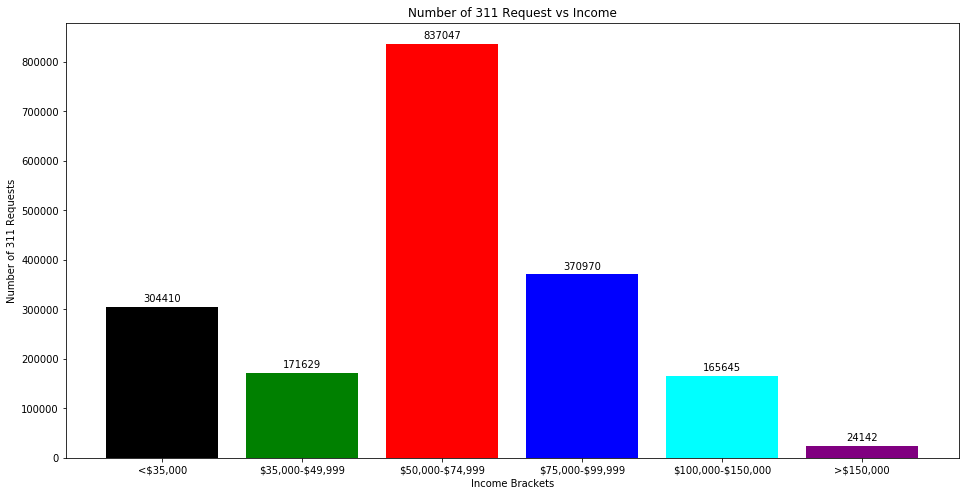

In [17]:
#plt.bar(income_range_case_count.index, income_range_case_count.values, color=['black', 'green', 'red', 'blue', 'cyan', 'purple'])

fig, ax = plt.subplots()
rects = ax.bar(income_range_case_count.index, income_range_case_count.values, color=['black', 'green', 'red', 'blue', 'cyan', 'purple'])

# attach a text label above each bar
for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
        xy=(rect.get_x() + rect.get_width() / 2, height),
        xytext=(0, 3),  # 3 points vertical offset
        textcoords="offset points",
        ha='center', va='bottom')    
    
plt.xlabel("Income Brackets")
plt.ylabel("Number of 311 Requests")
plt.title("Number of 311 Request vs Income")

The correlation between both factors is -0.14654140312610806
The correlation coefficient (rvalue) is -0.14654140312610806
The pvalue is 0.47501753549942016
The r-squared is: 0.02147438283016851


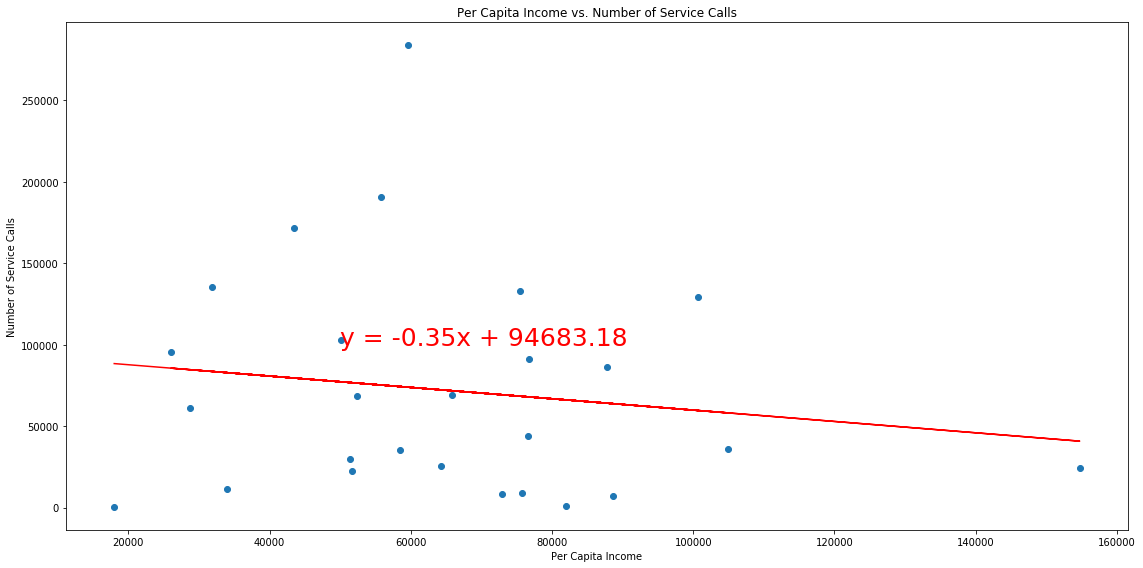

In [18]:

x_data = byzipcode_df['Per Capita Income']
y_data = byzipcode_df['Case Count']
plt.scatter(x_data, y_data)
plt.xlabel("Per Capita Income")
plt.ylabel("Number of Service Calls")
plt.title("Per Capita Income vs. Number of Service Calls")

correlation = st.pearsonr(x_data, y_data)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)

regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_data,regress_values,"r-")
plt.annotate(line_eq,(50000,100000),fontsize=25,color="red")

print(f"The correlation between both factors is {correlation[0]}")
print(f"The correlation coefficient (rvalue) is {rvalue}")
print(f"The pvalue is {pvalue}")
print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.show()

## Requests Per Person

In [19]:
income_range_case_count = groupby_income_ranges['Case Count'].sum()
income_range_population = groupby_income_ranges['Population'].sum()
income_range_requests_per_person =  income_range_case_count / income_range_population
income_range_population

Income Ranges
<$35,000               198223
\$35,000-\$49,999       30140
\$50,000-\$74,999      359333
\$75,000-\$99,999      202299
\$100,000-\$150,000     60022
>$150,000                7675
Name: Population, dtype: int32

Text(0.5, 1.0, 'Requests per person vs Income ')

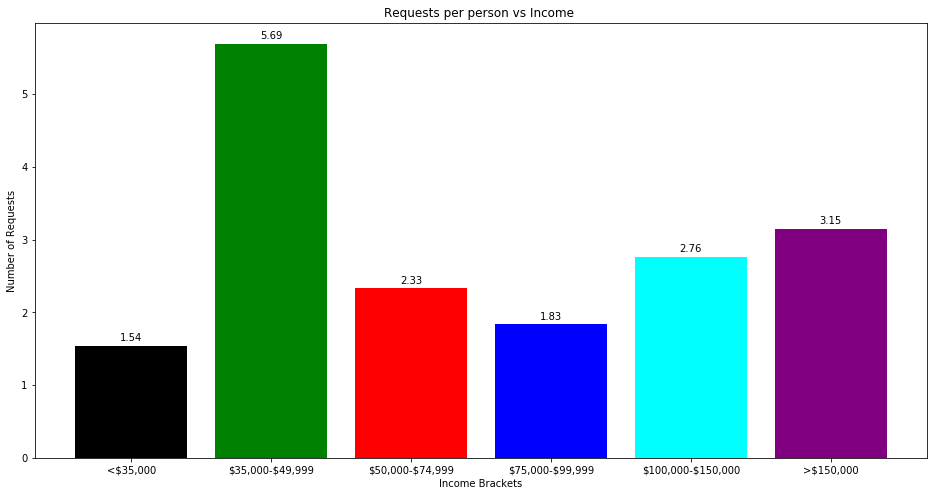

In [20]:
fig, ax = plt.subplots()
rects = ax.bar(income_range_requests_per_person.index, income_range_requests_per_person.values, color=['black', 'green', 'red', 'blue', 'cyan', 'purple'])

# attach a text label above each bar
for rect in rects:
    height = rect.get_height()
    ax.annotate('{:.2f}'.format(height),
        xy=(rect.get_x() + rect.get_width() / 2, height),
        xytext=(0, 3),  # 3 points vertical offset
        textcoords="offset points",
        ha='center', va='bottom')    
    
plt.xlabel("Income Brackets")
plt.ylabel("Number of Requests")
plt.title("Requests per person vs Income ")


In [21]:
byzipcode_df

,Case Count,Per Capita Income,Neighborhood,Population,Case Count Per Person,Income Ranges
Zipcode,,,,,,
94110,283725,59660,Mission,73737,3.847797,"\$50,000-\$74,999"
94103,190955,55807,South of Market,26990,7.075028,"\$50,000-\$74,999"
94102,171629,43488,Downtown / Union Square,30140,5.694393,"\$35,000-\$49,999"
94112,135401,31905,Sunnyside,85373,1.585993,"<$35,000"
94109,132828,75460,Cathedral Hill,56587,2.347324,"\$75,000-\$99,999"
94114,129520,100685,Mission Dolores,34561,3.747577,"\$100,000-\$150,000"
94116,102776,50165,Outer Sunset,47708,2.154272,"\$50,000-\$74,999"
94124,95472,26061,Bayview,35492,2.689958,"<$35,000"
94115,91114,76686,Pacific Heights,35751,2.548572,"\$75,000-\$99,999"


The correlation between both factors is 0.11377843190569407
The correlation coefficient (rvalue) is 0.11377843190569406
The pvalue is 0.588141766515732
The r-squared is: 0.012945531566918661


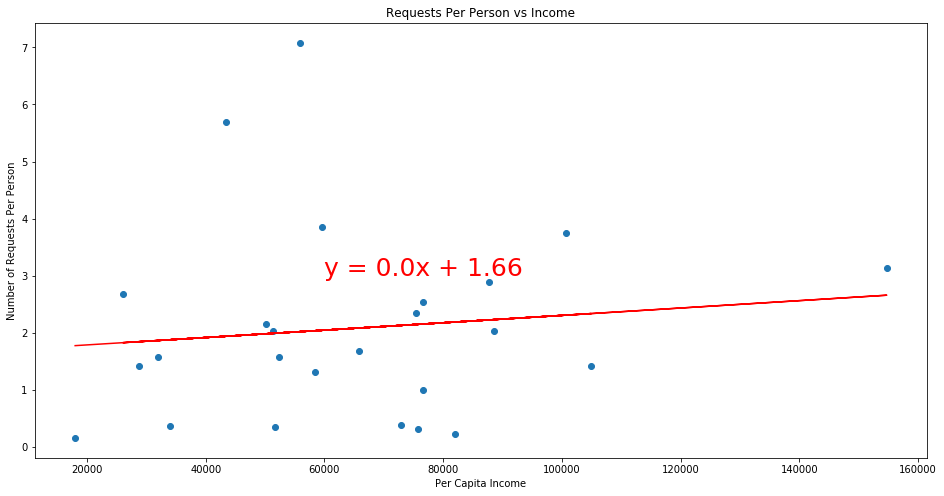

In [22]:

byzipcode_df_2 = byzipcode_df[byzipcode_df['Population'] > 1000]
x_data = byzipcode_df_2['Per Capita Income']
y_data = byzipcode_df_2['Case Count Per Person']
plt.scatter(x_data, y_data)
plt.xlabel("Per Capita Income")
plt.ylabel("Number of Requests Per Person")
plt.title("Requests Per Person vs Income")

correlation = st.pearsonr(x_data, y_data)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)

regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_data,regress_values,"r-")
plt.annotate(line_eq,(60000,3),fontsize=25,color="red")

print(f"The correlation between both factors is {correlation[0]}")
print(f"The correlation coefficient (rvalue) is {rvalue}")
print(f"The pvalue is {pvalue}")
print(f"The r-squared is: {rvalue**2}")

plt.show()

# Conclusion: 
## Rejected -> "Higher income will result in more 311 requests"